# Training Neural Networks

                                                Introduction

Le TD de Deep Learning vise à explorer les fondamentaux du deep learning en utilisant PyTorch, un framework populaire pour le développement de réseaux neuronaux. L'objectif principal est de construire, entraîner et évaluer un réseau de neurones pour la classification d'images en utilisant l'ensemble de données MNIST, qui comprend des images de chiffres manuscrits.

                                                Importation des Bibliothèques et Chargement des Données

Dans cette partie, nous importons les bibliothèques nécessaires et préparons les données d'entraînement en utilisant l'ensemble de données MNIST.

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

                                                Construction du Modèle

Nous définissons un modèle de réseau de neurones à trois couches avec des activations ReLU entre les couches, ensuite nous choisissons la fonction de perte appropriée pour un problème de classification multiclasse, en l'occurrence, la perte de l'entropie croisée. Pour finir, nous effectuons une itération d'entraînement, où nous faisons une passe avant (forward pass) à travers le réseau, calculons la perte et effectuons la rétropropagation.

In [2]:
# Build a feed-forward network
mymodel = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = mymodel(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3050, grad_fn=<NllLossBackward0>)


In [4]:
print('Before backward pass: \n', mymodel[0].weight.grad)

loss.backward()

print('After backward pass: \n', mymodel[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


                                                Mise à Jour des Poids

Nous utilisons un optimiseur (SGD dans ce cas) pour mettre à jour les poids du modèle en fonction des gradients calculés pendant la rétropropagation.

In [5]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(mymodel.parameters(), lr=0.01)

Nous observons les poids initiaux de la première couche du modèle, puis effectuons une itération d'entraînement. En utilisant un lot d'images redimensionnées à plat du jeu de données MNIST, nous réalisons une passe avant pour obtenir les prédictions. La perte est calculée à l'aide de la fonction de perte définie, suivie d'une rétropropagation pour mettre à jour les poids avec l'optimiseur. L'affichage des gradients de la première couche offre un aperçu des ajustements effectués au cours de cette itération.

In [6]:
print('Initial weights - ', mymodel[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = mymodel(images) #forward pass
loss = criterion(output, labels) # loss calculate
loss.backward() #backward
print('Gradient -', mymodel[0].weight.grad)#get the weigts

Initial weights -  Parameter containing:
tensor([[ 0.0302,  0.0257,  0.0265,  ...,  0.0357,  0.0341,  0.0291],
        [-0.0109, -0.0197, -0.0118,  ..., -0.0159,  0.0117, -0.0189],
        [-0.0252,  0.0151, -0.0256,  ..., -0.0158,  0.0197, -0.0240],
        ...,
        [-0.0041, -0.0223, -0.0178,  ..., -0.0198, -0.0279,  0.0216],
        [ 0.0160, -0.0051, -0.0217,  ..., -0.0254, -0.0275,  0.0128],
        [ 0.0314,  0.0310, -0.0350,  ...,  0.0082,  0.0125, -0.0312]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        ...,
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [7]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', mymodel[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0302,  0.0257,  0.0265,  ...,  0.0357,  0.0341,  0.0291],
        [-0.0110, -0.0197, -0.0118,  ..., -0.0159,  0.0117, -0.0189],
        [-0.0252,  0.0152, -0.0256,  ..., -0.0158,  0.0197, -0.0240],
        ...,
        [-0.0041, -0.0223, -0.0178,  ..., -0.0198, -0.0279,  0.0216],
        [ 0.0160, -0.0051, -0.0217,  ..., -0.0254, -0.0275,  0.0128],
        [ 0.0314,  0.0310, -0.0350,  ...,  0.0082,  0.0125, -0.0312]],
       requires_grad=True)


                                                Boucle d'Entraînement

Nous mettons en place une boucle d'entraînement complète qui parcourt plusieurs époques, effectue des itérations sur les lots et met à jour les poids du modèle.

In [8]:
my1model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(my1model.parameters(), lr=0.01)

epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = mymodel(images)
        loss = criterion(output, labels)
        
        #Backpropagate the loss
        loss.backward()
        
        #take one step of optimiser
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: -0.022540103444191162
Training loss: -0.02255203385758194
Training loss: -0.022546006934166248
Training loss: -0.022538721672820745
Training loss: -0.02254915160894233
Training loss: -0.022551155843171796
Training loss: -0.022543358540761647
Training loss: -0.022538876708367094
Training loss: -0.02255109083259911
Training loss: -0.02254902448899585
Training loss: -0.02253364638887348
Training loss: -0.02254669606238966
Training loss: -0.022540383819820306
Training loss: -0.02254069957031763
Training loss: -0.02254697310463734
Training loss: -0.02253754679474787
Training loss: -0.022540891703008725
Training loss: -0.022545481456129918
Training loss: -0.022547956592570157
Training loss: -0.022540715655737887
Training loss: -0.022544353244839103
Training loss: -0.0225539893185698
Training loss: -0.02254291764584118
Training loss: -0.0225354810170869
Training loss: -0.02253604785520345
Training loss: -0.02254510829047705
Training loss: -0.022552485766409558
Training loss: -0

                                                Visualisation des Résultats

Nous utilisons une image du jeu de données de test pour visualiser les résultats de la classification après l'entraînement.

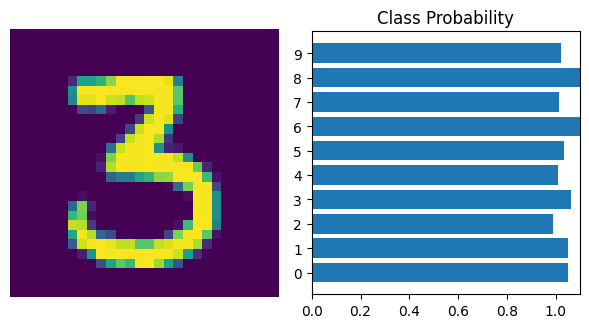

In [9]:
%matplotlib inline
import helper1

images, labels = next(iter(trainloader))

img = images[8].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = mymodel(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper1.view_classify(img.view(1, 28, 28), ps)